8.3.1 Fitting Classification Trees

In [1]:
library(tree) #Install package "tree" first. Skip this step if you already have it. #


In [2]:
library(ISLR)
attach(Carseats)
High = ifelse(Sales <= 8, "No", "Yes")


In [3]:
Carseats = data.frame(Carseats, High)
Carseats

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1    9.50 138        73    11          276        120   Bad       42  17       
2   11.22 111        48    16          260         83   Good      65  10       
3   10.06 113        35    10          269         80   Medium    59  12       
4    7.40 117       100     4          466         97   Medium    55  14       
5    4.15 141        64     3          340        128   Bad       38  13       
6   10.81 124       113    13          501         72   Bad       78  16       
7    6.63 115       105     0           45        108   Medium    71  15       
8   11.85 136        81    15          425        120   Good      67  10       
9    6.54 132       110     0          108        124   Medium    76  10       
10   4.69 132       113     0          131        124   Medium    76  17       
11   9.01 121        78     9          150        100   Bad       26  10       
12  11.96 117        94     4          503         94   Good      50  13       
13   3.98 122        35     2          393        136   Medium    62  18       
14  10.96 115        28    11           29         86   Good      53  18       
15  11.17 107       117    11          148        118   Good      52  18       
16   8.71 149        95     5          400        144   Medium    76  18       
17   7.58 118        32     0          284        110   Good      63  13       
18  12.29 147        74    13          251        131   Good      52  10       
19  13.91 110       110     0          408         68   Good      46  17       
20   8.73 129        76    16           58        121   Medium    69  12       
21   6.41 125        90     2          367        131   Medium    35  18       
22  12.13 134        29    12          239        109   Good      62  18       
23   5.08 128        46     6          497        138   Medium    42  13       
24   5.87 121        31     0          292        109   Medium    79  10       
25  10.14 145       119    16          294        113   Bad       42  12       
26  14.90 139        32     0          176         82   Good      54  11       
27   8.33 107       115    11          496        131   Good      50  11       
28   5.27  98       118     0           19        107   Medium    64  17       
29   2.99 103        74     0          359         97   Bad       55  11       
30   7.81 104        99    15          226        102   Bad       58  17       
⋮   ⋮     ⋮         ⋮      ⋮           ⋮          ⋮     ⋮         ⋮   ⋮        
371  7.68 126        41    22          403        119   Bad       42  12       
372  9.08 152        81     0          191        126   Medium    54  16       
373  7.80 121        50     0          508         98   Medium    65  11       
374  5.58 137        71     0          402        116   Medium    78  17       
375  9.44 131        47     7           90        118   Medium    47  12       
376  7.90 132        46     4          206        124   Medium    73  11       
377 16.27 141        60    19          319         92   Good      44  11       
378  6.81 132        61     0          263        125   Medium    41  12       
379  6.11 133        88     3          105        119   Medium    79  12       
380  5.81 125       111     0          404        107   Bad       54  15       
381  9.64 106        64    10           17         89   Medium    68  17       
382  3.90 124        65    21          496        151   Bad       77  13       
383  4.95 121        28    19          315        121   Medium    66  14       
384  9.35  98       117     0           76         68   Medium    63  10       
385 12.85 123        37    15          348        112   Good      28  12       
386  5.87 131        73    13          455        132   Medium    62  17       
387  5.32 152       116     0          170        160   Medium    39  16       
388  8.67 142        73    14          238        115   Medium    73  14       
389 

In [4]:
tree.carseats = tree(High ~ .-Sales, Carseats) # . represents all variables, .-Sales means the dataset with column of Sales removed.#
summary(tree.carseats)



Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

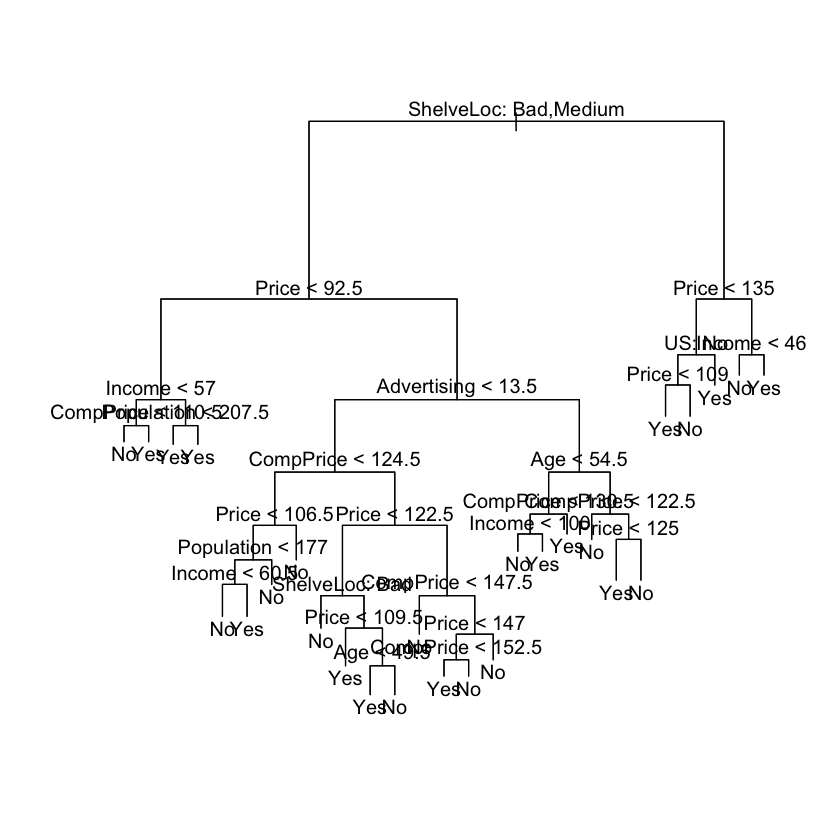

In [5]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)


In [6]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [8]:
set.seed(2)
train = sample(1:nrow(Carseats), 200) # Generate a vector randomly within Carseats column length.#
Carseats.test = Carseats[-train, ] # Remove these random-selected rows from the original dataset.#
Carseats.test
High.test = High[-train] # Correspondingly remove rows from High.#
tree.carseats = tree(High ~ .-Sales, Carseats, subset = train)
tree.pred = predict(tree.carseats, Carseats.test, type = "class")


Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1    9.50 138        73    11          276        120   Bad       42  17       
2   11.22 111        48    16          260         83   Good      65  10       
5    4.15 141        64     3          340        128   Bad       38  13       
9    6.54 132       110     0          108        124   Medium    76  10       
10   4.69 132       113     0          131        124   Medium    76  17       
12  11.96 117        94     4          503         94   Good      50  13       
13   3.98 122        35     2          393        136   Medium    62  18       
15  11.17 107       117    11          148        118   Good      52  18       
16   8.71 149        95     5          400        144   Medium    76  18       
18  12.29 147        74    13          251        131   Good      52  10       
21   6.41 125        90     2          367        131   Medium    35  18       
25  10.14 145       119    16          294        113   Bad       42  12       
28   5.27  98       118     0           19        107   Medium    64  17       
30   7.81 104        99    15          226        102   Bad       58  17       
33   6.20 107        32    12          236        137   Good      64  10       
34   8.77 114        38    13          317        128   Good      50  16       
36  11.07 131        84    11           29         96   Medium    44  17       
39   6.59 109        73     0          454        102   Medium    65  15       
40   3.24 130        60     0          144        138   Bad       38  10       
43  10.43  77        69     0           25         24   Medium    50  18       
45   4.16  85        79     6          325         95   Medium    69  13       
48   4.38 126        98     0          173        108   Bad       55  16       
52   4.42 121        90     0          150        108   Bad       75  16       
53   7.91 153        40     3          112        129   Bad       39  18       
54   6.92 109        64    13           39        119   Medium    61  17       
58   0.91  93        91     0           22        117   Bad       75  11       
62   7.32 105        32     0          358        107   Medium    26  13       
63   1.82 139        45     0          146        133   Bad       77  17       
65   7.80 100        67    12          184        104   Medium    32  16       
66   4.90 122        26     0          197        128   Medium    55  13       
⋮   ⋮     ⋮         ⋮      ⋮           ⋮          ⋮     ⋮         ⋮   ⋮        
331  4.99 122        59     0          501        112   Bad       32  14       
332 10.10 135        63    15          213        134   Medium    32  10       
333  5.74 106        33    20          354        104   Medium    61  12       
335  7.63  93       117     9          489         83   Bad       42  13       
336  6.18 120        70    15          464        110   Medium    72  15       
338  8.61 130        38     0          283        102   Medium    80  15       
342  7.38  98       120     0          268         93   Medium    72  10       
343  7.81 137       102    13          422        118   Medium    71  10       
344  5.99 117        42    10          371        121   Bad       26  14       
348  6.88  96        39     0          161        112   Good      27  14       
349 12.57 132       102    20          459        107   Good      49  11       
350  9.32 134        27    18          467         96   Medium    49  14       
351  8.64 111       101    17          266         91   Medium    63  17       
353 13.44 133       103    14          288        122   Good      61  17       
355  5.30 133        31     1           80        145   Medium    42  18       
360  3.13 130        62    11          396        130   Bad       66  14       
361  8.77 118        86     7          265        114   Good      52  15       
364 10.26 111        75     1          377        108   Good      25  12       
367 

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

In [10]:
conf = table(tree.pred, High.test) # Confusion matrix.#
conf
(conf[1,1] + conf[2,2]) / sum(conf)

[1] 0.715

In [12]:
set.seed(3)
cv.carseats = cv.tree(tree.carseats, FUN = prune.misclass)
names(cv.carseats)
cv.carseats



[1] "size"   "dev"    "k"      "method"

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

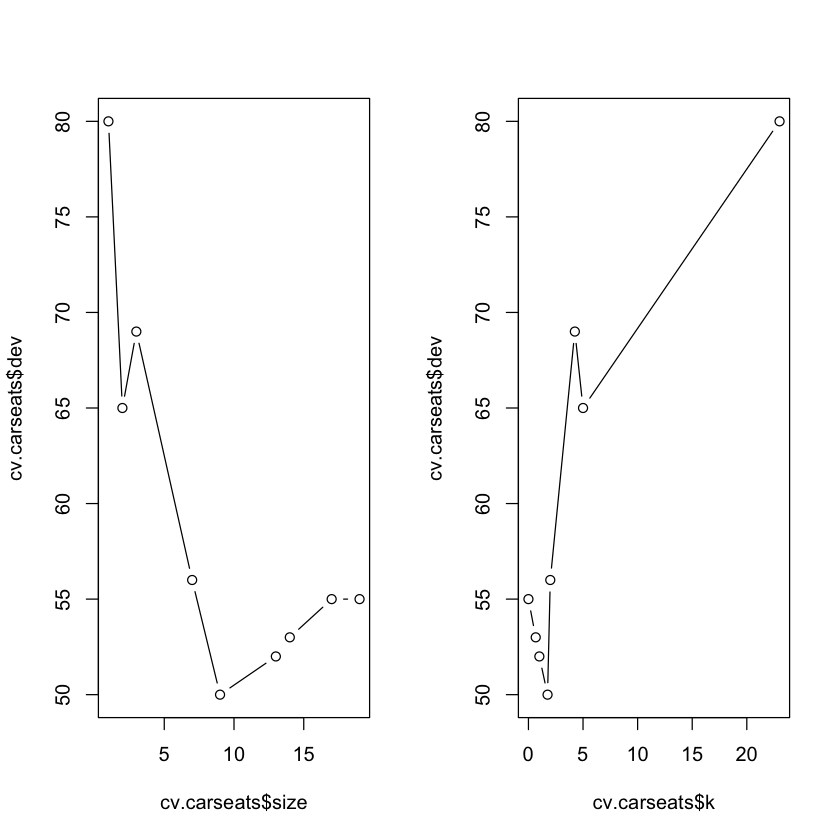

In [15]:
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = 'b')
plot(cv.carseats$k, cv.carseats$dev, type = 'b')


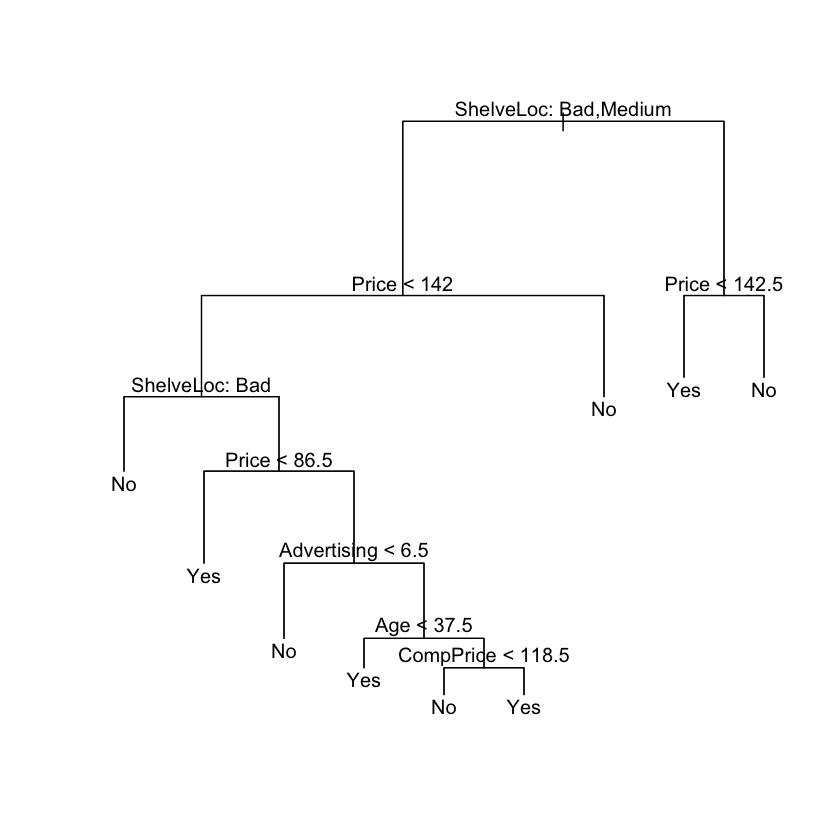

In [16]:
prune.carseats = prune.misclass(tree.carseats, best = 9)
plot(prune.carseats)
text(prune.carseats, pretty = 0)


In [17]:
tree.pred = predict(prune.carseats, Carseats.test, type = "class")
conf.prune = table(tree.pred, High.test)
conf.prune
(conf.prune[1,1] + conf.prune[2,2])/sum(conf.prune)


         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

[1] 0.77

         High.test
tree.pred No Yes
      No  86  22
      Yes 30  62

[1] 0.74

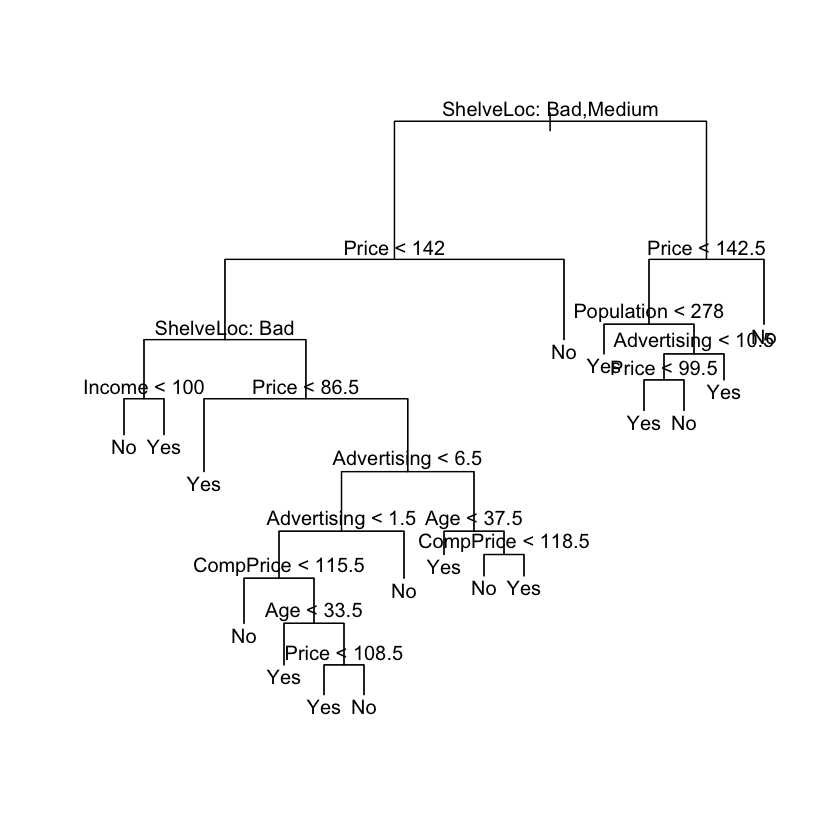

In [19]:
prune.carseats = prune.misclass(tree.carseats, best = 15)
plot(prune.carseats)
text(prune.carseats, pretty = 0)
tree.pred = predict(prune.carseats, Carseats.test, type = "class")
conf.prune2 = table(tree.pred, High.test)
conf.prune2
(conf.prune2[1,1] + conf.prune2[2,2])/sum(conf.prune2)


8.3.2 Fitting Regression Trees

In [27]:
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston = tree(medv ~ ., Boston, subset = train)
summary(tree.boston)



Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

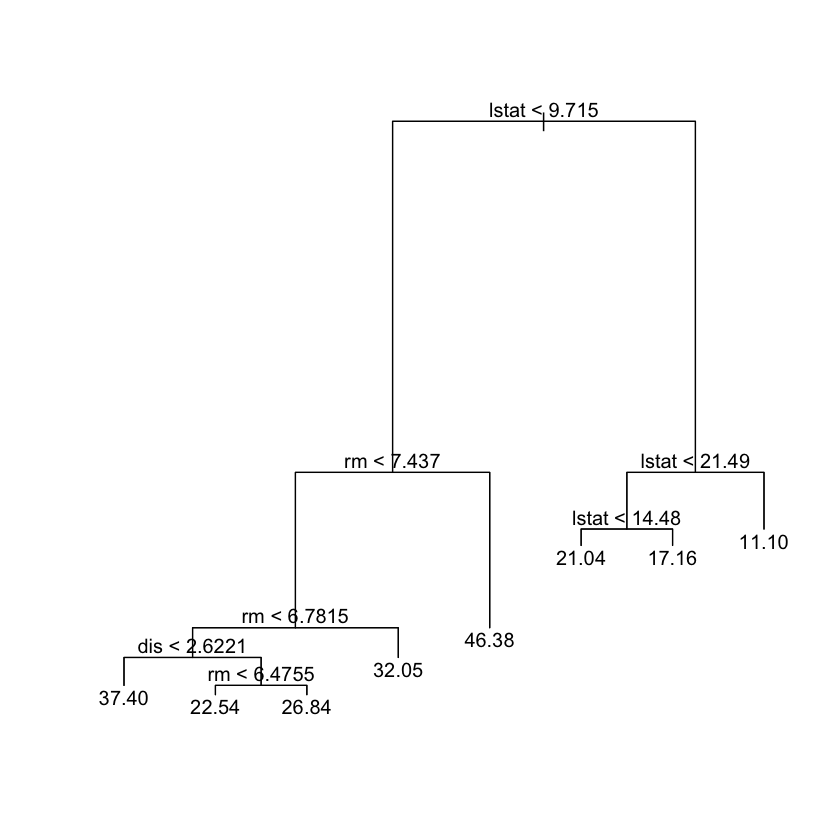

In [31]:
plot(tree.boston)
text(tree.boston, pretty = 0)


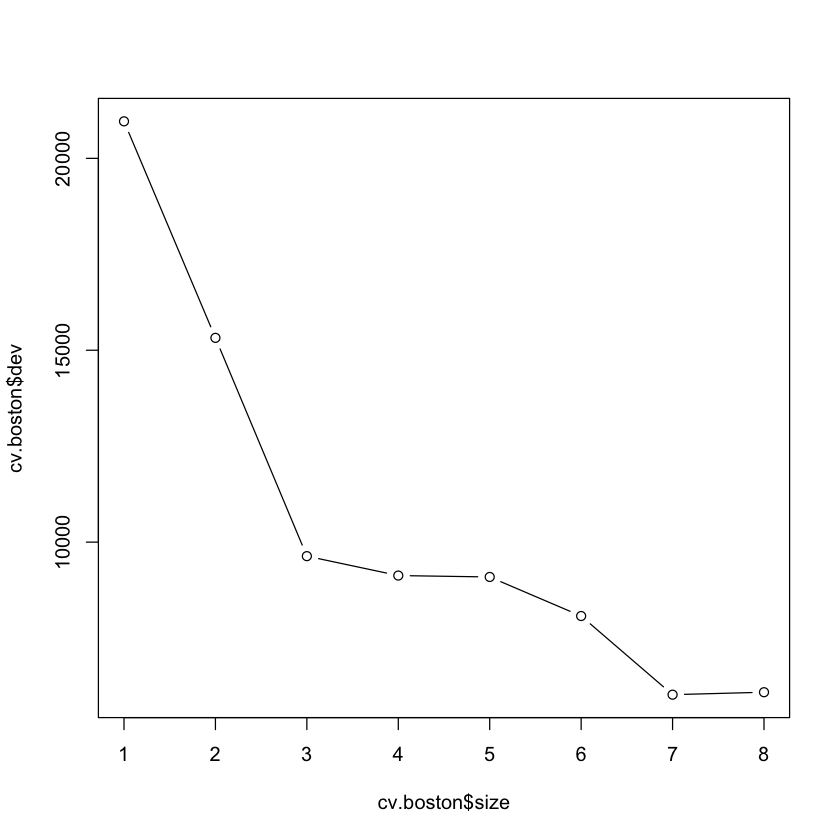

In [33]:
cv.boston = cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type = 'b')


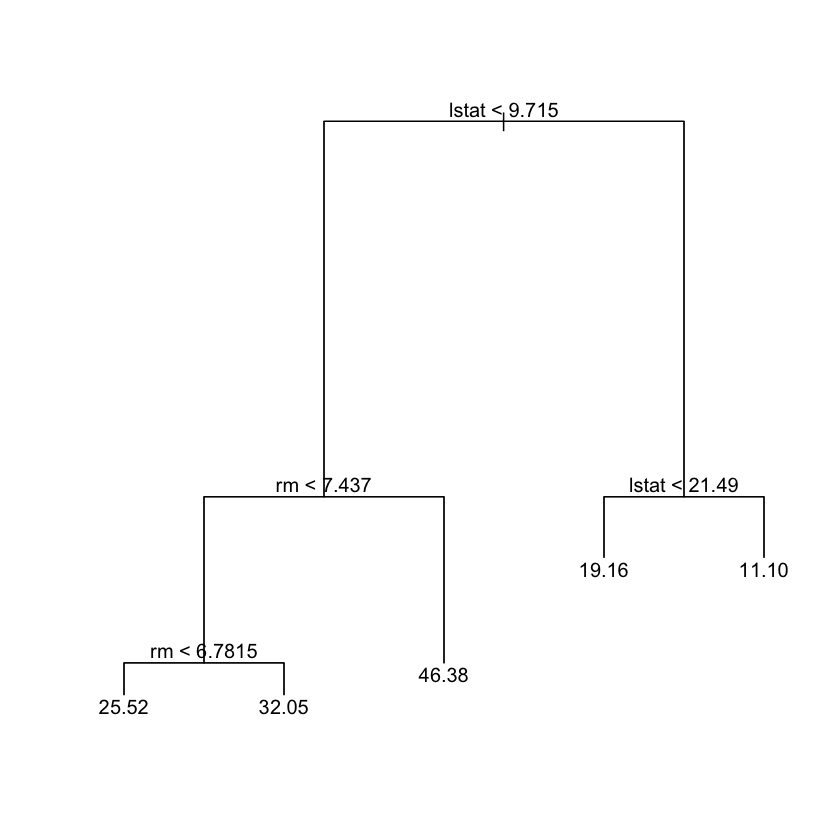

In [34]:
prune.boston = prune.tree(tree.boston, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)


[1] "25.05"

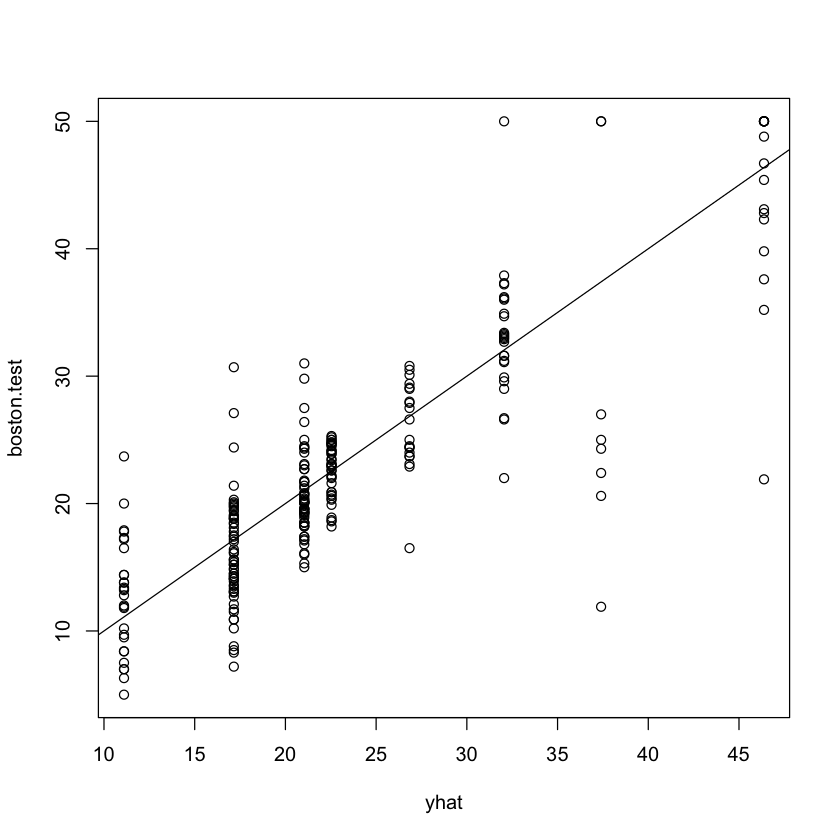

In [37]:
yhat = predict(tree.boston, newdata = Boston[-train, ])
boston.test = Boston[-train, "medv"]
plot(yhat, boston.test)
abline(0, 1)
format(mean((yhat - boston.test)^2), digit = 4)


8.3.3 Bagging and Random Forests

In [38]:
library(randomForest)
set.seed(1)
bag.boston = randomForest(medv ~ . , data = Boston, subset = train, mtry = 13, importance = TRUE)
bag.boston




randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.02509
                    % Var explained: 86.65

[1] 13.47

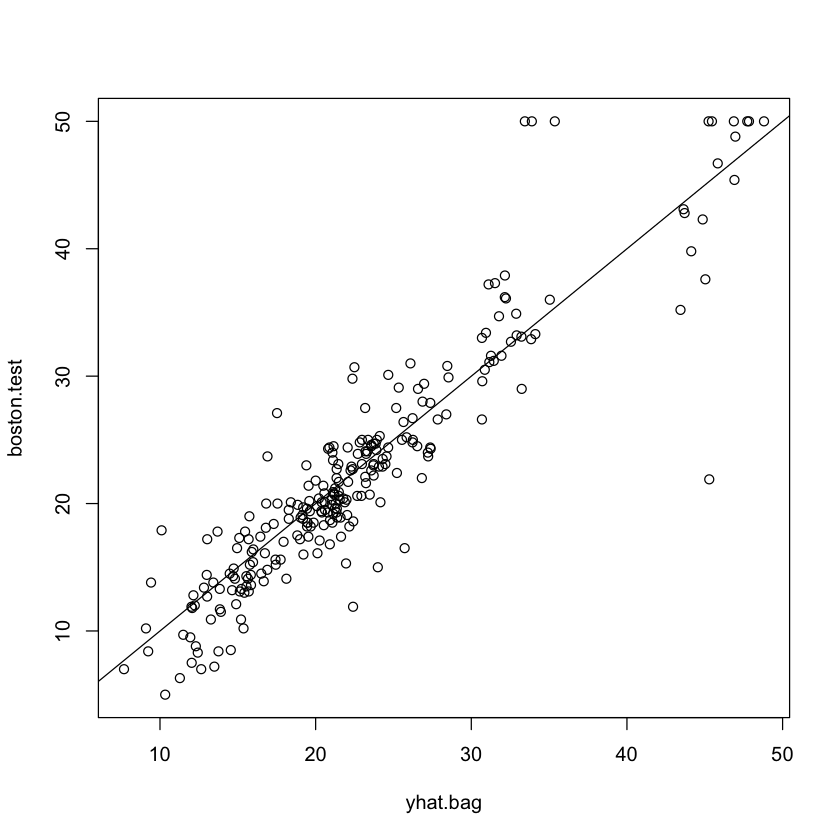

In [43]:
yhat.bag = predict(bag.boston, newdata = Boston[-train, ])
plot(yhat.bag, boston.test)
abline(0, 1)
round(mean((yhat.bag - boston.test)^2), digits = 2)


In [52]:
bag.boston = randomForest(medv ~ . , Boston, subset = train, mtry = 13, ntree = 25)
yhat.bag = predict(bag.boston, newdata = Boston[-train, ])
round(mean((yhat.bag - boston.test)^2), digits = 2)


[1] 13.51

In [55]:
rf.boston = randomForest(medv ~ . ,Boston, subset = train, mtry = 6, importance = TRUE)
yhat.rf = predict(rf.boston, newdata = Boston[-train, ])
round(mean((yhat.rf - boston.test)^2), digits = 2)


[1] 11.2

In [56]:
importance(rf.boston)


%IncMSE   IncNodePurity
crim    12.407444 1019.46301   
zn       2.153127   57.75222   
indus   10.046190 1097.09330   
chas     0.598734   73.97076   
nox     10.760543  999.11626   
rm      32.166687 5960.13188   
age     11.176298  531.98131   
dis     14.298794 1387.74308   
rad      3.513125   79.37168   
tax      9.590726  449.06999   
ptratio 11.963410  955.00928   
black    7.230899  336.65487   
lstat   29.578244 7533.17012

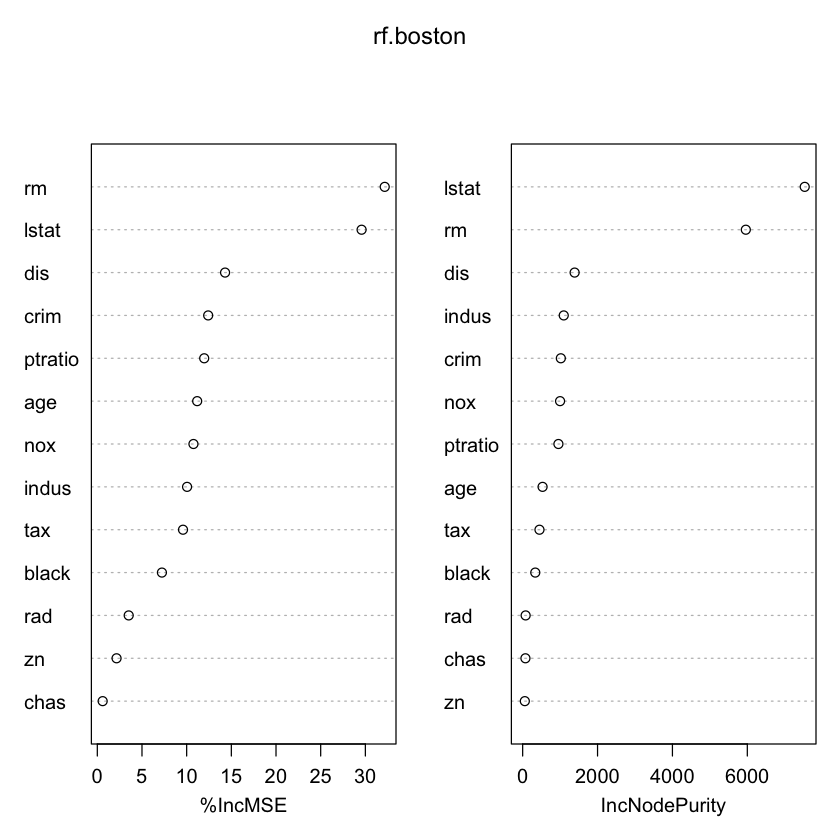

In [57]:
varImpPlot(rf.boston)


8.3.4 Boosting

var     rel.inf   
lstat   lstat   45.9627334
rm      rm      31.2238187
dis     dis      6.8087398
crim    crim     4.0743784
nox     nox      2.5605001
ptratio ptratio  2.2748652
black   black    1.7971159
age     age      1.6488532
tax     tax      1.3595005
indus   indus    1.2705924
chas    chas     0.8014323
rad     rad      0.2026619
zn      zn       0.0148083

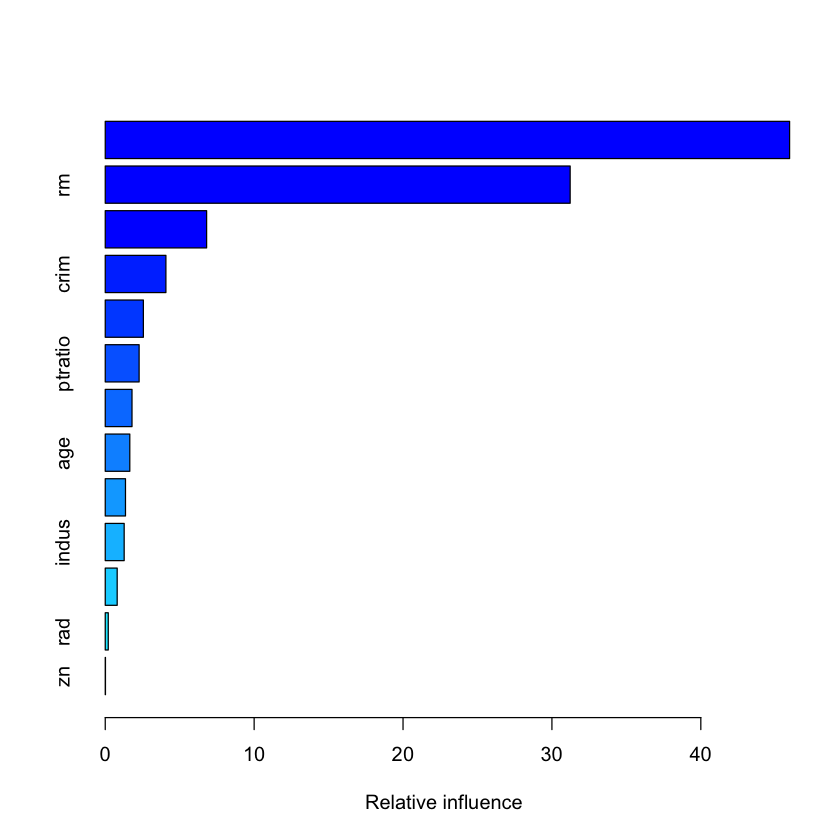

In [60]:
library(gbm)
set.seed(1)
boost.boston = gbm(medv ~ . , Boston[train, ], distribution = "gaussian", n.trees = 5000, interaction.depth = 4)
summary(boost.boston)


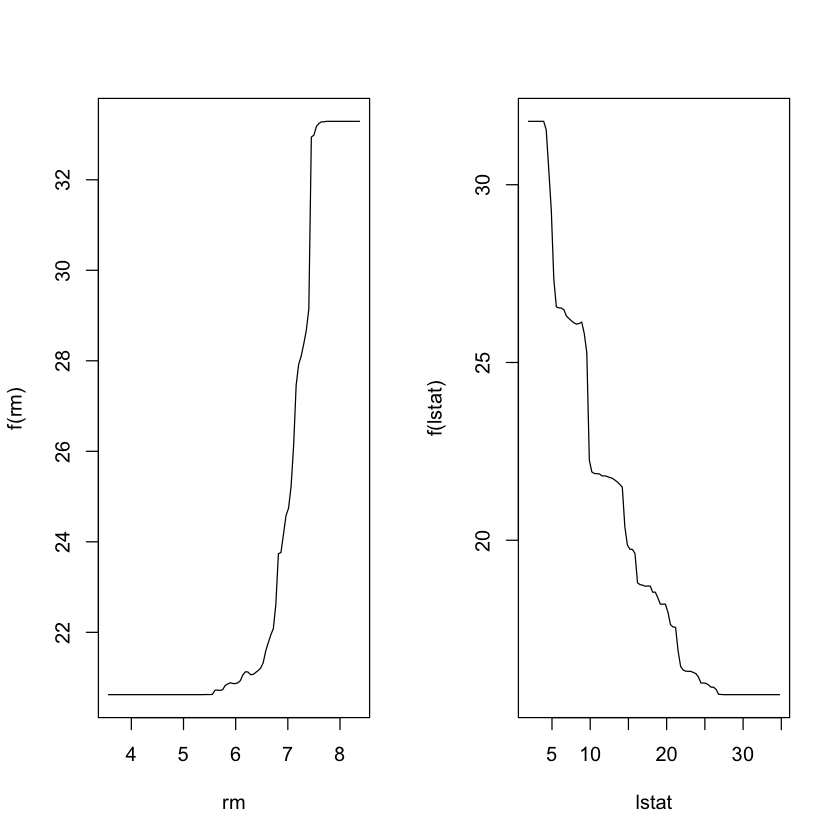

In [61]:
par(mfrow = c(1, 2))
plot(boost.boston, i = "rm")
plot(boost.boston, i = "lstat")


In [62]:
yhat.boost = predict(boost.boston, newdata = Boston[-train, ], n.trees = 5000)
round(mean((yhat.boost - boston.test)^2), digits = 2)


[1] 11.84

In [64]:
boost.boston = gbm(medv ~ . , Boston[train, ], distribution = "gaussian", n.trees = 5000, 
                   interaction.depth = 4, shrinkage = 0.2, verbose = F)
yhat.boost = predict(boost.boston, newdata = Boston[-train, ], n.trees = 5000)
round(mean((yhat.boost - boston.test)^2), digits = 2)


[1] 11.51